In [15]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from sklearn.model_selection import train_test_split
import ipdb
np.random.seed(666)
num_observations = 500

x1 = np.random.multivariate_normal([0, 0],[[1, .5],[.5, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4],[[1, .5],[.5, 1]], num_observations)

X = np.vstack((x1, x2)).astype(np.float32)
Y = np.hstack((np.zeros(num_observations), np.ones(num_observations)))

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, shuffle=True)

In [17]:
# def show(X, y, w_0, w, title = "Samples and Classifier",th=0):
#     plt.figure()
#     plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.9, edgecolors='black')
#     # ipdb.set_trace()
#     xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))
#     xy = np.c_[xx.ravel(), yy.ravel()]
#     xy_1 = np.concatenate((xy,np.ones((xy.shape[0],1))), axis=1)
#     Z = np.dot(xy_1, w)
#     Z = Z.reshape(xx.shape)
#     plt.contour(xx, yy, Z, levels=[th], colors='b')
    
#     Z = np.dot(xy_1, w_0)
#     Z = Z.reshape(xx.shape)
#     plt.contour(xx, yy, Z, levels=[th], colors='y')

#     display.clear_output(wait=True)
#     plt.title(title)
#     plt.show()

In [36]:
def show(X, y, w_0, w, title = "Samples and Classifier",th=0):
    plt.figure()
    plt.ylim([-5,8])
    plt.xlim([-4,4])
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.9, edgecolors='black')   
    plt.plot([-4,4],[(th-w[2,:]-w[0,:]*(-4))/w[1,:],(th-w[2,:]-w[0,:]*(4))/w[1,:]], 'b')
    plt.plot([-4,4],[(th-w_0[2,:]-w_0[0,:]*(-4))/w_0[1,:],(th-w_0[2,:]-w_0[0,:]*(4))/w_0[1,:]], 'y')
    display.clear_output(wait=True)
    plt.title(title)
    plt.show()

In [129]:
def Precision(pred, y):
    # precision = TP / (TP + FP)
    y = y.reshape((1,-1))
    pred = pred.reshape((1,-1))
    index_ = pred == 1
    TP = (y[index_] == 1).sum()

    return (TP / index_.sum())


def Recall(pred, y):
    # recall = TP / (TP + FN)
    y = y.reshape((1,-1))
    pred = pred.reshape((1,-1))
    index_ = y == 1
    TP = (pred[index_] == 1).sum()

    return (TP / index_.sum())


def Accuracy(pred, y):
    y = y.reshape((1,-1))
    pred = pred.reshape((1,-1))
    return ((pred == y).sum() / len(y))


def Fscore(pred, y):
    # F = 5PR / (2P + 3R)
    y = y.reshape((1,-1))
    pred = pred.reshape((1,-1))
    P = Precision(pred, y)
    R = Recall(pred, y)

    F = 5 * P * R / (2 * P + 3 * R)

    return F

def cal_error(label, pred):
    label = label.reshape((1,-1))
    pred = pred.reshape((1,-1))
    err = np.average(1-(pred == label))
    return err

def L2_loss(label, pred):
    label = label.reshape((1,-1))
    pred = pred.reshape((1,-1))
    err = 0.5*np.average(np.power(pred - label,2))
    return err

In [20]:
class Perception():
    def __init__(self,n_feature, lr=1e-3, th = 0) -> None:
        self.n_feature = n_feature
        # self.w = np.zeros((n_feature+1, 1))
        # self.w = 1.1*np.ones((n_feature+1, 1))
        self.w = np.random.randn(n_feature+1, 1)
        self.lr=lr
        self.trainable = True
        self.th = th

    def __f_x(self,input):
        return np.float32(input > self.th)

    def eval(self,):
        self.trainable = False

    def train(self,):
        self.trainable = True
    
    def forward(self,x_in,y_in=None):
        if x_in.shape[-1] is not self.n_feature:
            print(f"Error: expect [-1, {self.n_feature}] but got {x_in.shape}")
            return
        x_in = x_in.reshape((-1,self.n_feature))
        x_in = np.concatenate((x_in,np.ones((x_in.shape[0],1))), axis=1)
        y_out = self.__f_x(np.dot(x_in, self.w))
        if self.trainable ==  True:
            y_in = np.reshape(y_in, y_out.shape)
            self.grad = y_in - y_out
        return y_out

    def backward(self,x_in):
        if self.trainable == False:
            print("Error: Model Not Trainable")
            return
        if x_in.shape[-1] is not self.n_feature:
            print(f"Error: expect [-1, {self.n_feature}] but got {x_in.shape}")
            return
        x_in = x_in.reshape((-1,self.n_feature))
        x_in = np.concatenate((x_in,np.ones((x_in.shape[0],1))), axis=1)
        w_t1 = self.w + self.lr * np.dot(x_in.T, self.grad)
        self.w = w_t1
    



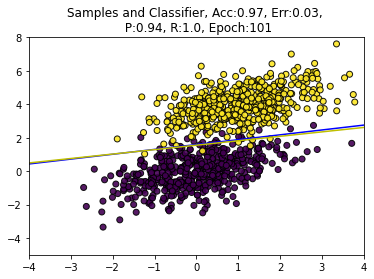

In [131]:
acc_s = []
p_s = []
f_s = []
r_s = []
loss_s = []
model = Perception(2,lr=1e-3,th=0.5)
epoch = 25
err_th = 0.02
err=1.0
epoch_cnt = 0
# for i in range(epoch):
while err > err_th and epoch_cnt < 101:
    # X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, shuffle=True)
    epoch_cnt += 1
    w_0 = model.w
    for j in range(len(X_train)):
        model.train()
        y_i = model.forward(X_train[j],Y_train[j])
        model.backward(X_train[j]) 
        
        # if j%100 == 0:
    model.eval()
    y_o = model.forward(X_test)
    acc = np.average(y_o == (Y_test.reshape((-1,1))))
    acc_s.append(acc)
    err = cal_error(Y_test, y_o)
    p = np.round(Precision(y_o,Y_test),3)
    r = np.round(Recall(y_o,Y_test),3)
    loss = L2_loss(Y_test, y_o)
    p_s.append(p)
    r_s.append(r)
    loss_s.append(loss)
    show(X, Y, w_0, model.w, title = f"Samples and Classifier, Acc:{acc}, Err:{err}, \n P:{p}, R:{r}, Epoch:{epoch_cnt}", th=model.th)

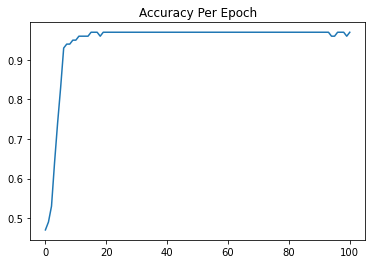

In [132]:
plt.plot(acc_s)
plt.title("Accuracy Per Epoch")
plt.show()

In [133]:
all_acc = []
all_p = []
all_r = []
all_loss = []

epoch = 100
err=1.0
lrs = np.linspace(1e-5, 1e-3, 10)
lrs = np.round(lrs, 5)
for lr in lrs:
    model = Perception(2,lr=lr,th=0.5)
    acc_s = []
    p_s = []
    r_s = []
    loss_s = []
    for i in range(epoch):
        w_0 = model.w
        for j in range(len(X_train)):
            model.train()
            y_i = model.forward(X_train[j],Y_train[j])
            model.backward(X_train[j]) 
            loss = L2_loss(y_o,Y_test)
            loss_s.append(loss)
            # if j%100 == 0:
        model.eval()
        y_o = model.forward(X_test)
        acc = np.average(y_o == (Y_test.reshape((-1,1))))
        acc_s.append(acc)
        p = np.round(Precision(y_o,Y_test),3)
        r = np.round(Recall(y_o,Y_test),3)
        
        p_s.append(p)
        r_s.append(r)
        
    all_acc.append(acc_s)
    all_p.append(p_s)
    all_r.append(r_s)
    all_loss.append(loss_s)
    

/tmp/ipykernel_33506/206369539.py:8: RuntimeWarning: invalid value encountered in long_scalars
  return (TP / index_.sum())


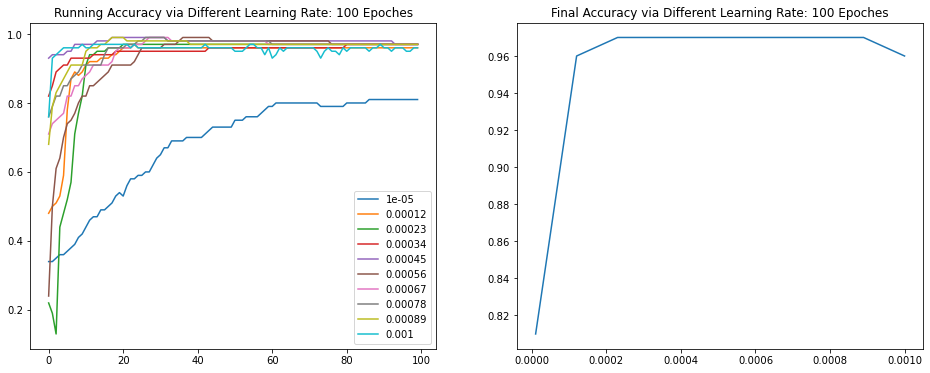

In [134]:
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
for k in range(len(all_acc)):
    acc_s = all_acc[k]
    lr = lrs[k]
    plt.plot(list(range(epoch)),acc_s,label=f"{lr}")
plt.title(f"Running Accuracy via Different Learning Rate: {epoch} Epoches")
plt.legend(loc=4)

plt.subplot(1,2,2)
final_acc = []
for k in range(len(all_acc)):
    acc_s = all_acc[k]
    final_acc.append(acc_s[-1])
plt.plot(list(lrs),final_acc)
plt.title(f"Final Accuracy via Different Learning Rate: {epoch} Epoches")

plt.show()

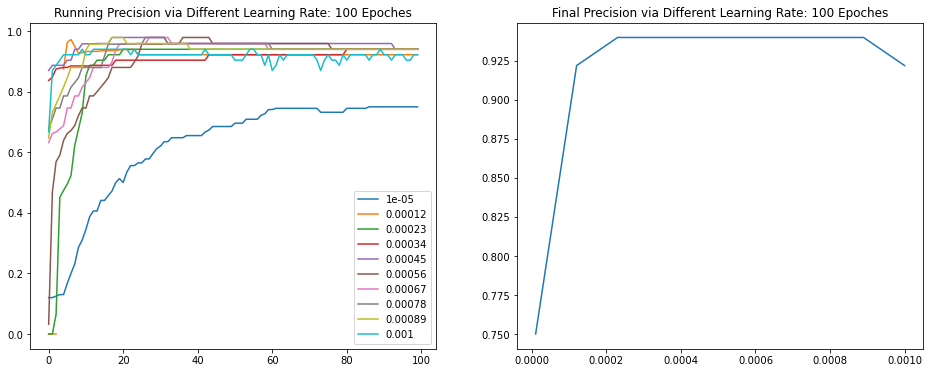

In [135]:
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
for k in range(len(all_p)):
    p_s = all_p[k]
    lr = lrs[k]
    plt.plot(list(range(epoch)),p_s,label=f"{lr}")
plt.title(f"Running Precision via Different Learning Rate: {epoch} Epoches")
plt.legend(loc=4)

plt.subplot(1,2,2)
final_p = []
for k in range(len(all_p)):
    p_s = all_p[k]
    final_p.append(p_s[-1])
plt.plot(list(lrs),final_p)
plt.title(f"Final Precision via Different Learning Rate: {epoch} Epoches")

plt.show()

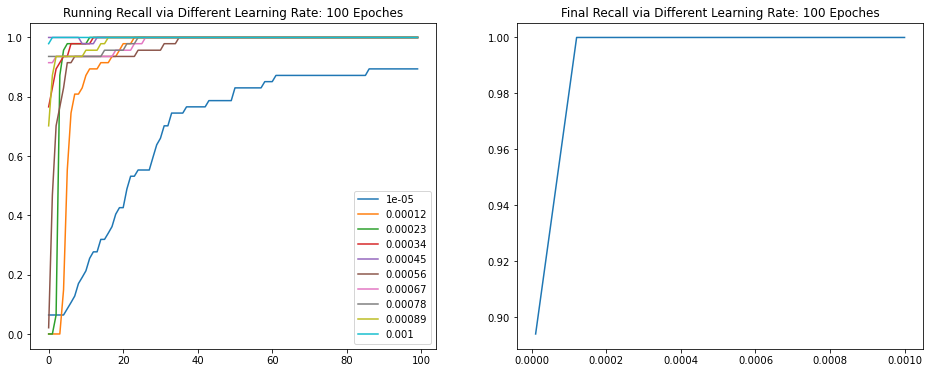

In [136]:
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
for k in range(len(all_r)):
    r_s = all_r[k]
    lr = lrs[k]
    plt.plot(list(range(epoch)),r_s,label=f"{lr}")
plt.title(f"Running Recall via Different Learning Rate: {epoch} Epoches")
plt.legend(loc=4)

plt.subplot(1,2,2)
final_r = []
for k in range(len(all_r)):
    r_s = all_r[k]
    final_r.append(r_s[-1])
plt.plot(list(lrs),final_r)
plt.title(f"Final Recall via Different Learning Rate: {epoch} Epoches")

plt.show()

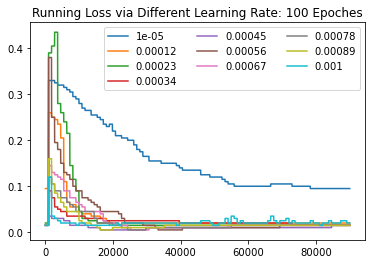

In [140]:

for k in range(len(all_loss)):
    loss_s = all_loss[k]
    lr = lrs[k]
    plt.plot(list(range(len(loss_s))),loss_s,label=f"{lr}")
plt.title(f"Running Loss via Different Learning Rate: {epoch} Epoches")
plt.legend(loc='upper right',ncol=3)
plt.show()